#Richmore Dzanza

##Technical Assessment

#PROJECT : Furniture Shop SALES FORECASTING:

# 1. Business Understanding 
##Introduction:
In this analysis, a Cross-Industry Standard Process for Data Mining (CRISP-DM) was followed as a base to develop a prediction model for the forecasting of sales of a superstore furniture shop. The superstore's data is used in order to validate the use of the various machine learning algorithms. Two Machine Learning Algorithms were built, in comparison, which are Random Forest Regression and Decision Tree. The regression Tree perfoms better than the random forest in this analysis with a Root Mean Squared Error(RMSE) of 15,6.


#2. Data Understanding

In [65]:

# importing libraries
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport 
import math  
import sklearn.metrics  

%matplotlib inline

import datetime

## Import the dataset

In [8]:
data = pd.read_excel('/Superstore.xlsx')



##Filter the required Category 'Furniture'

In [9]:

fsalesdata= data[data["Category"] == 'Furniture']

##Exploratory Data Analysis (EDA)
## Data Information

In [10]:
fsalesdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 9990
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

There are 2121 observations in the data and 21 columns, with only 4 float variables

##Check for Duplicates

In [85]:
fsalesdata.duplicated().sum()

0

There are no duplicates in the data

## Sales per Region

In [34]:
# Let's see sales per Region:

def sales_per_region(fsalesdata):
    sales_by_region = fsalesdata.groupby('Region')['Sales'].sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(8,6))
    sns.barplot(sales_by_region.Region, sales_by_region.Sales, color='darkred')
    
    ax.set(xlabel = "Region", ylabel = "Sum of Sales", title = "Total Sales Per Region")
    
    return sales_by_region

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Region,Sales
0,Central,163797.1638
1,East,208291.2040
2,South,117298.6840
3,West,252612.7435


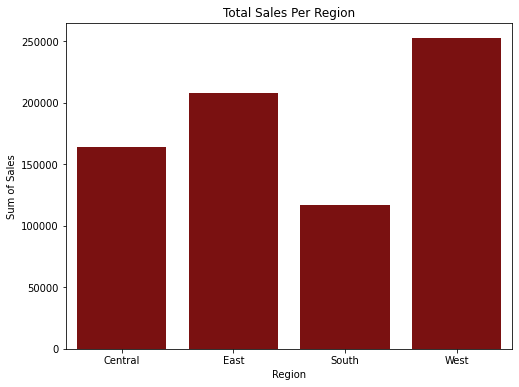

In [37]:
sales_per_region(fsalesdata)

Furniture shop is maxmising sales from the West Region and getting the lowest in the South Region.

## Ploting Sales over time in days

In [38]:
df = fsalesdata[['Order Date', 'Sales']]
df

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


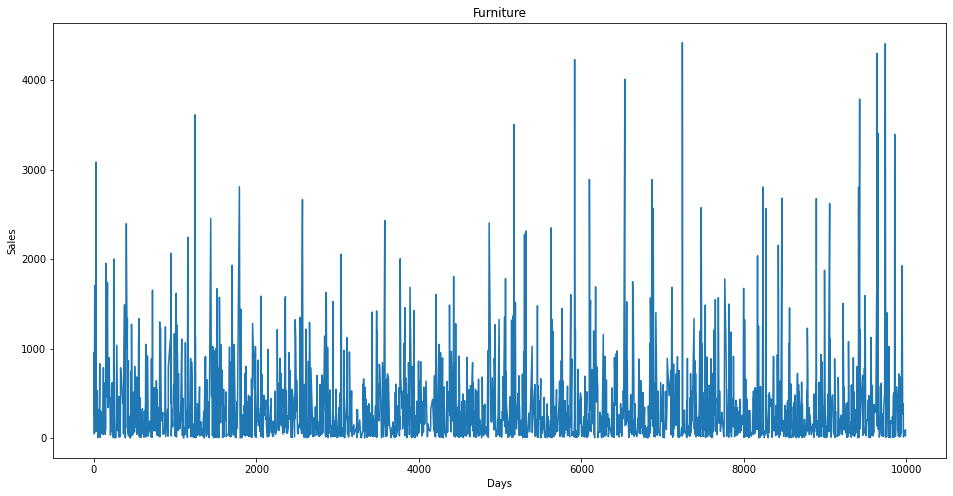

In [39]:
# Visualizing the Sales patterns in the data.
plt.figure(figsize=(16,8))
plt.title('Furniture')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.plot(df['Sales'])
plt.show()

The pattern can be clearly seen after some monthly aggregation and find the monthly average and plot over time.

##Top 10 Products

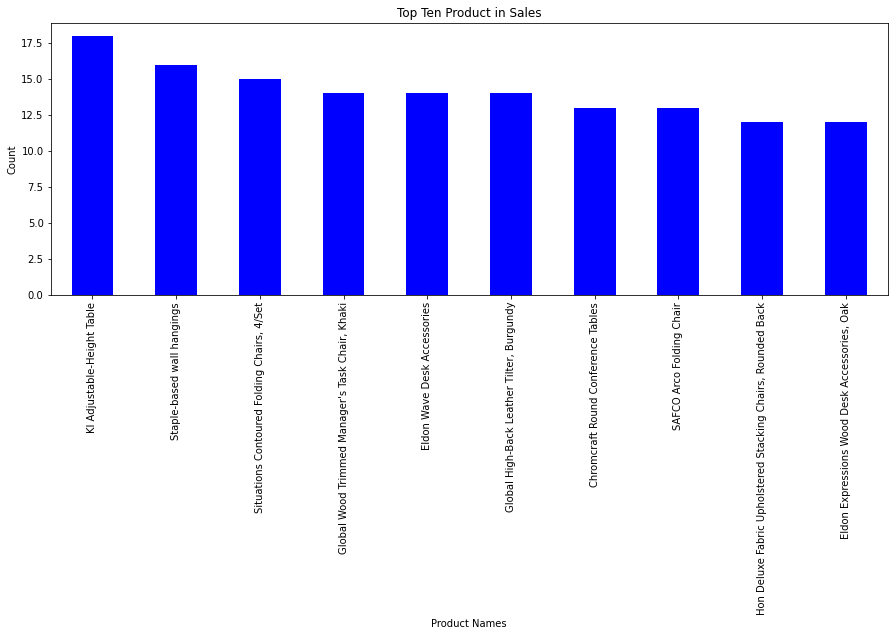

In [87]:
plt.figure(figsize=(15,5))
TopTen = fsalesdata.groupby('Product Name')['Row ID'].count().sort_values(ascending=False)
TopTen = TopTen [:10]
TopTen.plot(kind='bar', color='blue')
plt.title('Top Ten Product in Sales')
plt.ylabel('Count')
plt.xlabel('Product Names')
plt.show()

The KI Adjustable-Hieght Table tops the list.

#3. Data Preparation

## Create dummies and drop non essential columns

In [17]:
data.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [42]:
dummy2=pd.get_dummies(fsalesdata[['Region','Segment','Category','Sub-Category','Sales','Quantity', 'Discount' , 'Profit','Order Date']],drop_first=True)
dummy2.head(5)

,Sales,Quantity,Discount,Profit,Order Date,Region_East,Region_South,Region_West,Segment_Corporate,Segment_Home Office,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables
0,261.9600,2,0.00,41.9136,2016-11-08,0,1,0,0,0,0,0,0
1,731.9400,3,0.00,219.5820,2016-11-08,0,1,0,0,0,1,0,0
3,957.5775,5,0.45,-383.0310,2015-10-11,0,1,0,0,0,0,0,1
5,48.8600,7,0.00,14.1694,2014-06-09,0,0,1,0,0,0,1,0
10,1706.1840,9,0.20,85.3092,2014-06-09,0,0,1,0,0,0,0,1


## Correlation Matrix and Multicollinnearity check

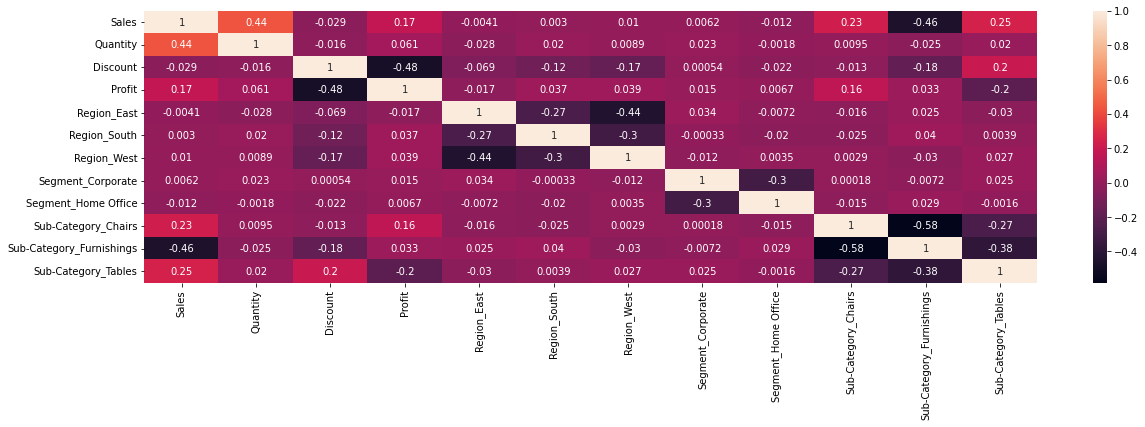

In [43]:
plt.figure(figsize=(20,5))
sns.heatmap(dummy2.corr(),annot=True)

- Since most of the variables have weak relationship with the Response variable, It is important that we experiment with all the variables and train the first model and later on remove the once with the smallest correlation values to the response variable.

- There is no multicollinearity amongst the independent variables, hence no variables are to be removed.

## Checking outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


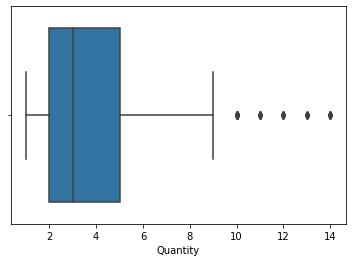

In [88]:
sns.boxplot('Quantity', data=dummy2)




The quantity variable is skewed to the right.

In [44]:
fsales = dummy2

fsales.head()

,Sales,Quantity,Discount,Profit,Order Date,Region_East,Region_South,Region_West,Segment_Corporate,Segment_Home Office,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables
0,261.9600,2,0.00,41.9136,2016-11-08,0,1,0,0,0,0,0,0
1,731.9400,3,0.00,219.5820,2016-11-08,0,1,0,0,0,1,0,0
3,957.5775,5,0.45,-383.0310,2015-10-11,0,1,0,0,0,0,0,1
5,48.8600,7,0.00,14.1694,2014-06-09,0,0,1,0,0,0,1,0
10,1706.1840,9,0.20,85.3092,2014-06-09,0,0,1,0,0,0,0,1


In [45]:
import datetime

fsalesdate = fsalesdata[['Order Date']]
oyears = pd.DatetimeIndex(fsalesdate['Order Date']).year

oyears.unique()

#print(year)

Int64Index([2016, 2015, 2014, 2017], dtype='int64', name='Order Date')

## Check the distribution of dataset by year??

In [23]:
#datprof = ProfileReport(fsales)
#datprof.to_file("profiling.html")
#datprof

## Some further analysis

In [46]:
startdate = fsales['Order Date'].min()
enddate = fsales['Order Date'].max()
startdate

Timestamp('2014-01-06 00:00:00')

In [47]:
# Checking for missing values ion the data.
fsales.isnull().sum()

Sales                       0
Quantity                    0
Discount                    0
Profit                      0
Order Date                  0
Region_East                 0
Region_South                0
Region_West                 0
Segment_Corporate           0
Segment_Home Office         0
Sub-Category_Chairs         0
Sub-Category_Furnishings    0
Sub-Category_Tables         0
dtype: int64

#Indexing Order Date

In [48]:
fsales['Order Date'] = pd.to_datetime(fsales['Order Date'])
fsales= fsales.set_index('Order Date')
fsales

,Sales,Quantity,Discount,Profit,Region_East,Region_South,Region_West,Segment_Corporate,Segment_Home Office,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables
Order Date,,,,,,,,,,,,
2016-11-08,261.9600,2,0.00,41.9136,0,1,0,0,0,0,0,0
2016-11-08,731.9400,3,0.00,219.5820,0,1,0,0,0,1,0,0
2015-10-11,957.5775,5,0.45,-383.0310,0,1,0,0,0,0,0,1
2014-06-09,48.8600,7,0.00,14.1694,0,0,1,0,0,0,1,0
2014-06-09,1706.1840,9,0.20,85.3092,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-19,383.4656,4,0.32,-67.6704,0,0,0,0,1,0,0,0
2016-12-05,13.4000,1,0.00,6.4320,1,0,0,1,0,0,1,0
2015-09-06,85.9800,1,0.00,22.3548,0,1,0,0,0,0,0,1


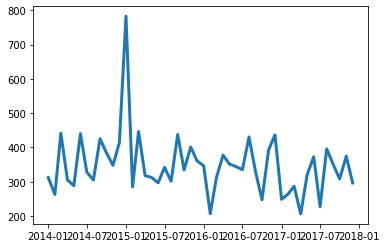

In [49]:
#create new DataFrame 
monthly_sales = pd.DataFrame()

monthly_sales['Sales'] = fsales['Sales'].resample('MS').mean()

#plot monthly sales data
plt.plot(monthly_sales.index, monthly_sales.Sales, linewidth=3)

##Spliting data into features and labels

Features are separated as predictors (X) and target (y)

In [57]:


X = fsales.drop('Sales',axis=1)
X = fsales.iloc[:, :].values
y = fsales['Sales'].values


array([261.96  , 731.94  , 957.5775, ...,  85.98  ,  25.248 ,  91.96  ])

#Splitting the dataset into the Training set and Test set

For traing and testing purposes, and avoiding infomation leakage, the data is split before scaling. A ratio of 80:20 was chosen. This can be change for experimental purposes to seek to achieve a higher purfoming model.

In [58]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [59]:
print(X_train)

[[3.55600e+01 7.00000e+00 0.00000e+00 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 [9.75680e+01 2.00000e+00 2.00000e-01 ... 1.00000e+00 0.00000e+00
  0.00000e+00]
 [8.36592e+02 8.00000e+00 4.00000e-01 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 ...
 [9.66700e+02 5.00000e+00 3.00000e-01 ... 1.00000e+00 0.00000e+00
  0.00000e+00]
 [3.43920e+02 4.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 [8.54400e+00 4.00000e+00 2.00000e-01 ... 0.00000e+00 1.00000e+00
  0.00000e+00]]


The data is now at the same scale to avoid noise in the data.

#Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [32]:
print(X_train)

[[ 1.41075834 -0.96181239  0.04857424]
 [-0.80629702  0.13268158 -0.08374207]
 [ 1.85416942  1.22717555 -1.96661674]
 ...
 [ 0.5239362   0.67992857 -0.13984505]
 [ 0.08052512 -0.96181239  0.51104551]
 [ 0.08052512  0.13268158 -0.02539556]]


#4. Modelling-Random Forest Regression

##Training a Random Forest Regression Model

In [62]:
from sklearn.ensemble import RandomForestRegressor
randmfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
randmfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

Evaluation of random forest using Cross validation, K=10

In [63]:
from sklearn.model_selection import cross_val_score
randmfr_accuracy = cross_val_score(estimator = randmfr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(randmfr_accuracy.mean()*100))
print("Standard Deviation: {:.2f} %".format(randmfr_accuracy.std()*100))

Accuracy: 99.90 %
Standard Deviation: 0.14 %


#5. Evaluation-Random Forest
##Using Test Dataset yo predict the fitted model

In [64]:
randmfr_y_pred = randmfr.predict(X_test)
randmfr_y_pred

array([9.11075240e+01, 2.26166400e+01, 8.40925000e+01, 9.09405300e+02,
       2.39535440e+02, 3.11150260e+02, 1.21146100e+02, 8.80566000e+00,
       6.33260000e+01, 2.11919200e+01, 3.11363440e+02, 3.66644154e+02,
       1.21273835e+03, 3.86597055e+02, 4.78190980e+02, 3.13210840e+02,
       6.03225900e+02, 1.89134400e+01, 1.41384172e+03, 2.01570596e+03,
       2.28348800e+01, 2.09974690e+02, 1.00668076e+03, 7.62135590e+02,
       1.47576000e+01, 1.54046400e+01, 1.55454840e+02, 2.10678230e+02,
       2.22604800e+01, 2.20507480e+02, 1.41559352e+03, 1.74981600e+01,
       1.22171240e+02, 1.61730800e+01, 8.40592320e+02, 1.11040380e+02,
       1.15957000e+01, 7.63199000e+02, 2.91058920e+02, 4.03232400e+01,
       1.43558200e+01, 1.51860870e+03, 4.78625580e+02, 2.13343410e+02,
       2.26712000e+01, 1.91835675e+02, 1.94346000e+01, 1.22415533e+03,
       5.62810085e+02, 6.67415120e+01, 1.95220400e+01, 1.27350000e+02,
       1.13829400e+02, 1.83978640e+02, 2.14783100e+02, 4.36196550e+02,
      

## Root Mean Squared Error

In [67]:
randmfr_rmse= math.sqrt(sklearn.metrics.mean_squared_error(y_test,randmfr_y_pred))
randmfr_rmse

28.559602829810657

## USING RANDOMIZED SEACRH CV TO TUNE THE HYPER PARAMTERS 

In [68]:
from sklearn.model_selection import RandomizedSearchCV
parameters = [{'n_estimators': [140,180,240,260,270,290],
               'max_depth':[3.9,3.8,4,4.2,4.1]}]
randmfr_grid_search = RandomizedSearchCV(estimator = randmfr,
                           param_distributions = parameters,
                           n_iter=10,
                           cv = 10,
                           n_jobs = -1)
randmfr_grid_search = randmfr_grid_search.fit(X_train, y_train)
randmfr_best_score = randmfr_grid_search.best_score_
randmfr_best_parameters =randmfr_grid_search.best_params_
print("Best Score: {:.2f} %".format(randmfr_best_score*100))
print("Best Parameters:", randmfr_best_parameters)

Best Score: 99.77 %
Best Parameters: {'n_estimators': 180, 'max_depth': 4}


In [69]:
parameters = [{'n_estimators': [200,260],
               'max_depth':[4,4.08,4.09,4.07]}]
randmfr_grid_search = RandomizedSearchCV(estimator = randmfr,
                           param_distributions = parameters,
                           n_iter=10,
                           cv = 10,
                           n_jobs = -1)
randmfr_grid_search = randmfr_grid_search.fit(X_train, y_train)
randmfr_best_score = randmfr_grid_search.best_score_
randmfr_best_parameters = randmfr_grid_search.best_params_
print("Best Score: {:.2f} %".format(randmfr_best_score*100))
print("Best Parameters:", randmfr_best_parameters)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Best Score: 99.77 %
Best Parameters: {'n_estimators': 260, 'max_depth': 4}


In [70]:
parameters = [{'n_estimators': [280,290,300,310,320],
               'max_depth':[4,4.07,4.08,4.06]}]
randmfr_grid_search = RandomizedSearchCV(estimator = randmfr,
                           param_distributions = parameters,
                           n_iter=10,
                           cv = 10,
                           n_jobs = -1)
randmfr_grid_search = randmfr_grid_search.fit(X_train, y_train)
randmfr_best_score = randmfr_grid_search.best_score_
randmfr_best_parameters = randmfr_grid_search.best_params_
print("Best Score: {:.2f} %".format(randmfr_best_score*100))
print("Best Parameters:", randmfr_best_parameters)

Best Score: 99.76 %
Best Parameters: {'n_estimators': 280, 'max_depth': 4.06}


In [71]:
randmfr_y_pred=randmfr_grid_search.predict(X_test)
randmfr_y_pred

array([  85.43517785,   25.4661601 ,   85.43517785,  882.12054809,
        229.41805488,  316.58600984,  130.36842354,   25.4661601 ,
         75.9946333 ,   25.4661601 ,  316.58600984,  354.67188207,
       1223.09110423,  407.80133075,  471.31356724,  316.58600984,
        579.66149746,   25.4661601 , 1360.49785002, 2011.41347017,
         25.4661601 ,  219.02731991, 1043.59883144,  731.43494196,
         25.4661601 ,   25.4661601 ,  158.11163962,  219.02731991,
         25.4661601 ,  219.59957429, 1370.96268871,   25.4661601 ,
        131.46897891,   25.4661601 ,  875.87041839,   90.68886971,
         25.4661601 ,  734.29991856,  312.07802984,   25.4661601 ,
         25.4661601 , 1550.76913738,  471.7039568 ,  219.02731991,
         25.4661601 ,  199.84509269,   25.4661601 , 1238.3649322 ,
        552.26606951,   80.4613285 ,   25.4661601 ,  138.29189405,
         96.67335961,  177.53754239,  219.02731991,  422.8529893 ,
        179.90722714,   83.98510987, 4005.99871741,   83.98510

##Root Mean Squared Error after tuning the Hyper Parameters

In [72]:
randmfr_rmse= math.sqrt(sklearn.metrics.mean_squared_error(y_test,randmfr_y_pred))
randmfr_rmse

35.20542677725473

There is a slight decrease in the accuracy of the model from a RMSE of 28.6 to 35.2 after using the randomized search CV to tune the hyper parameters.

#4. Modelling-Decision Tree

##Training a Decision Tree Regression Model

In [73]:
from sklearn.tree import DecisionTreeRegressor
decntree = DecisionTreeRegressor(random_state = 0)
decntree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [74]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = decntree, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracy.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy.std()*100))

Accuracy: 99.83 %
Standard Deviation: 0.12 %


#5. Evaluation-Decision Tree
##Predicting using the test dataset with the fitted model

In [75]:
decntree_y_pred = decntree.predict(X_test)
decntree_y_pred

array([9.099000e+01, 2.260800e+01, 8.395200e+01, 9.097200e+02,
       2.396660e+02, 3.108800e+02, 1.219600e+02, 8.752000e+00,
       6.320000e+01, 2.144000e+01, 3.107440e+02, 3.667440e+02,
       1.212960e+03, 3.871360e+02, 4.784800e+02, 3.131760e+02,
       6.039200e+02, 1.896000e+01, 1.454900e+03, 2.003920e+03,
       2.260800e+01, 2.099790e+02, 1.013488e+03, 7.656250e+02,
       1.476000e+01, 1.548800e+01, 1.558800e+02, 2.106800e+02,
       2.228800e+01, 2.209600e+02, 1.421664e+03, 1.747200e+01,
       1.213760e+02, 1.619200e+01, 8.429400e+02, 1.111500e+02,
       1.156800e+01, 7.601160e+02, 2.911360e+02, 4.056000e+01,
       1.436800e+01, 1.526560e+03, 4.784800e+02, 2.132160e+02,
       2.260800e+01, 1.918200e+02, 1.952000e+01, 1.228465e+03,
       5.632400e+02, 6.669000e+01, 1.930000e+01, 1.273020e+02,
       1.139200e+02, 1.839200e+02, 2.155440e+02, 4.359990e+02,
       1.847520e+02, 7.044800e+01, 4.228704e+03, 7.044800e+01,
       8.544000e+00, 5.232600e+02, 1.222000e+01, 1.7005

#Root Mean Squared Error

In [76]:
decntree_rmse = decntree_rmse= math.sqrt(sklearn.metrics.mean_squared_error(y_test,decntree_y_pred))  ## Root Mean Squared Error
decntree_rmse

15.705371470854427

Hyper Parameter Tuning.

In [78]:
parameters = [{'splitter' : ["best", "random"],
               'max_depth':[4,6],
              'ccp_alpha':[0.2,0.3,0.4,0.5]}]
decntree_grid_search = RandomizedSearchCV(estimator = decntree,
                           param_distributions = parameters,
                           n_iter=10,
                           cv = 10,
                           n_jobs = -1)
decntree_grid_search = decntree_grid_search.fit(X_train, y_train)
decntree_best_score = decntree_grid_search.best_score_
best_parameters = decntree_grid_search.best_params_
print("Best score: {:.2f} %".format(decntree_best_score*100))
print("Best Parameters:", best_parameters)

Best score: 99.80 %
Best Parameters: {'splitter': 'best', 'max_depth': 6, 'ccp_alpha': 0.2}


In [80]:
parameters = [{'splitter' : ["best"],
               'max_depth':[4,4.7,4.8,4.9,5.1],
              'ccp_alpha':[0.2,0.23,0.24,0.26,0.31]}]
decntree_grid_search = RandomizedSearchCV(estimator = decntree,
                           param_distributions = parameters,
                           n_iter=10,
                           cv = 10,
                           n_jobs = -1)
decntree_grid_search = decntree_grid_search.fit(X_train, y_train)
decntree_best_accuracy = decntree_grid_search.best_score_
best_parameters = decntree_grid_search.best_params_
print("Best Score: {:.2f} %".format(decntree_best_score*100))
print("Best Parameters:", best_parameters)

Best Score: 99.80 %
Best Parameters: {'splitter': 'best', 'max_depth': 5.1, 'ccp_alpha': 0.24}


In [81]:
parameters = [{'splitter' : ["best"],
               'max_depth':[5.2,5.25,4.9,5.4,5.9,6.4],
              'ccp_alpha':[0.231,0.232,0.233,0.234,0.235]}]
decntree_grid_search = RandomizedSearchCV(estimator = decntree,
                           param_distributions = parameters,
                           n_iter=10,
                           cv = 10,
                           n_jobs = -1)
decntree_grid_search = decntree_grid_search.fit(X_train, y_train)
decntree_best_score = decntree_grid_search.best_score_
best_parameters = decntree_grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(decntree_best_score*100))
print("Best Parameters:",best_parameters)

Best Accuracy: 99.80 %
Best Parameters: {'splitter': 'best', 'max_depth': 6.4, 'ccp_alpha': 0.232}


## Root Mean Squared Error

In [82]:
decntree_y_pred=decntree_grid_search.predict(X_test)
decntree_y_pred

array([  92.12286531,   21.039     ,   76.13183056,  921.94346154,
        244.28160465,  317.35888235,  127.35891525,    9.83575887,
         61.45993684,   21.039     ,  317.35888235,  364.9203175 ,
       1200.17444444,  391.45002069,  479.25070833,  317.35888235,
        589.59196   ,   21.039     , 1456.775     , 2032.7784    ,
         21.039     ,  203.89197049, 1016.97022222,  757.520375  ,
          9.83575887,   21.039     ,  147.031     ,  203.89197049,
         21.039     ,  223.50415625, 1401.116     ,   21.039     ,
        127.35891525,   21.039     ,  847.4126087 ,  108.65704167,
          9.83575887,  757.520375  ,  295.73896667,   44.63752083,
          9.83575887, 1501.88844444,  479.25070833,  203.89197049,
         21.039     ,  186.26714186,   21.039     , 1270.07390909,
        554.1558913 ,   61.45993684,   21.039     ,  127.35891525,
        108.65704167,  186.26714186,  223.50415625,  447.70353125,
        186.26714186,   76.13183056, 4228.704     ,   76.13183

In [83]:
decntree_rmse = decntree_rmse= math.sqrt(sklearn.metrics.mean_squared_error(y_test,decntree_y_pred))  ## Root Mean Squared Error
decntree_rmse

26.42028534145677

There is a slight decrease in the accuracy of the model from a RMSE of 15.7 to 26.4 after perfoming some hyper parameter tuning.